In [ ]:
import pandas as pd
import datetime

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, SimpleRNN, LSTM, GRU, CuDNNLSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
apple = pd.read_csv('AAPL.csv', sep = '\t')
apple

Date        High         Low        Open       Close       Volume  \
0     2010-01-04   30.642857   30.340000   30.490000   30.572857  123432400.0   
1     2010-01-05   30.798571   30.464285   30.657143   30.625713  150476200.0   
2     2010-01-06   30.747143   30.107143   30.625713   30.138571  138040000.0   
3     2010-01-07   30.285715   29.864286   30.250000   30.082857  119282800.0   
4     2010-01-08   30.285715   29.865715   30.042856   30.282858  111902700.0   
...          ...         ...         ...         ...         ...          ...   
2259  2018-12-24  151.550003  146.589996  148.149994  146.830002   37169200.0   
2260  2018-12-26  157.229996  146.720001  148.300003  157.169998   58582500.0   
2261  2018-12-27  156.770004  150.070007  155.839996  156.149994   53117100.0   
2262  2018-12-28  158.520004  154.550003  157.500000  156.229996   42291400.0   
2263  2018-12-31  159.360001  156.479996  158.529999  157.740005   35003500.0   

       Adj Close  
0      26.601469  
1      26.647457  
2      26.223597  
3      26.175119  
4      26.349140  
...          ...  
2259  144.656540  
2260  154.843475  
2261  153.838562  
2262  153.917389  
2263  155.405045  

[2264 rows x 7 columns]

In [ ]:
google = pd.read_csv('GOOG.csv', sep = '\t')
google

Date         High          Low         Open        Close  \
0     2010-01-04   313.579620   310.954468   312.304413   312.204773   
1     2010-01-05   312.747742   309.609497   312.418976   310.829926   
2     2010-01-06   311.761444   302.047852   311.761444   302.994293   
3     2010-01-07   303.861053   295.218445   303.562164   295.940735   
4     2010-01-08   300.498657   293.455048   294.894653   299.885956   
...          ...          ...          ...          ...          ...   
2259  2018-12-24  1003.539978   970.109985   973.900024   976.219971   
2260  2018-12-26  1040.000000   983.000000   989.010010  1039.459961   
2261  2018-12-27  1043.890015   997.000000  1017.150024  1043.880005   
2262  2018-12-28  1055.560059  1033.099976  1049.619995  1037.079956   
2263  2018-12-31  1052.699951  1023.590027  1050.959961  1035.609985   

          Volume    Adj Close  
0      3927000.0   312.204773  
1      6031900.0   310.829926  
2      7987100.0   302.994293  
3     12876600.0   295.940735  
4      9483900.0   299.885956  
...          ...          ...  
2259   1590300.0   976.219971  
2260   2373300.0  1039.459961  
2261   2109800.0  1043.880005  
2262   1414800.0  1037.079956  
2263   1493300.0  1035.609985  

[2264 rows x 7 columns]

# Preprocess

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scale = MinMaxScaler(feature_range=(0,1), copy=True)
apple.set_index('Date', inplace = True)
google.set_index('Date', inplace = True)
apple=Scale.fit_transform(apple)
google=Scale.fit_transform(google)

In [ ]:
google

array([[0.08852273, 0.09191458, 0.0892667 , 0.09036546, 0.1317225 ,
        0.09036546],
       [0.08773316, 0.0906126 , 0.08937553, 0.08905746, 0.20246902,
        0.08905746],
       [0.08679702, 0.08329262, 0.0887509 , 0.08160283, 0.26818406,
        0.08160283],
       ...,
       [0.78169582, 0.75603442, 0.75884981, 0.78646371, 0.07064569,
        0.78646371],
       [0.79277243, 0.79098066, 0.78969535, 0.7799943 , 0.04728646,
        0.7799943 ],
       [0.79005776, 0.78177464, 0.79096828, 0.77859581, 0.04992488,
        0.77859581]])

In [ ]:

def make_Data(data):
    Data=[]
    Targets=[]
    s=0
    series=[]

    for i in range(len(data)):
      s = 0
      if i+31<=len(data):
        for s in range(31):
          if s==30:
            Targets.append(data[i+s][-1])
            Data.append(np.array(series))
            series=[]
          else:
            series.append(data[i+s])
    Data=np.array(Data)
    Targets=np.array(Targets)
    from sklearn.utils import shuffle
    Data, Targets=shuffle(Data, Targets, random_state=1)
    print(np.shape(Data))
    print(np.shape(Targets))
    return(Data, Targets)

In [ ]:
"""def make_Data(data):
    Data=[]
    Targets=[]
    s=0
    series=[]

    for i in range(len(data)):
      
      if i+31<=len(data):
          if s==30:
            Targets.append(data[i][-1])
            Data.append(np.array(series))
            series=[]
            s = 0
          else:
            series.append(data[i])
            s+=1
    Data=np.array(Data)
    Targets=np.array(Targets)
    from sklearn.utils import shuffle
    Data, Targets=shuffle(Data, Targets, random_state=1)
    print(np.shape(Data))
    print(np.shape(Targets))
    return(Data, Targets)"""

'def make_Data(data):\n    Data=[]\n    Targets=[]\n    s=0\n    series=[]\n\n    for i in range(len(data)):\n      \n      if i+31<=len(data):\n          if s==30:\n            Targets.append(data[i][-1])\n            Data.append(np.array(series))\n            series=[]\n            s = 0\n          else:\n            series.append(data[i])\n            s+=1\n    Data=np.array(Data)\n    Targets=np.array(Targets)\n    from sklearn.utils import shuffle\n    Data, Targets=shuffle(Data, Targets, random_state=1)\n    print(np.shape(Data))\n    print(np.shape(Targets))\n    return(Data, Targets)'

In [ ]:
a_data, a_target = make_Data(apple)
g_data, g_target = make_Data(google)

(2234, 30, 6)
(2234,)
(2234, 30, 6)
(2234,)


In [ ]:
from math import floor
def seperate_Test(Data, Targets):
    length = len(Data)
    num_test=floor(length*0.2)
    print(num_test)
    Train=Data[:(length-num_test)]
    targets=Targets[:(length-num_test)]

    Test=Data[(length-num_test):]
    targets_test=Targets[(length-num_test):]
    print(np.shape(Train))
    print(np.shape(Test))
    print(np.shape(targets))
    print(np.shape(targets_test))
    return(Train, Test, targets, targets_test)
    

In [ ]:
ax_train, ax_test, ay_train, ay_test = seperate_Test(a_data, a_target)
gx_train, gx_test, gy_train, gy_test = seperate_Test(g_data, g_target)

446
(1788, 30, 6)
(446, 30, 6)
(1788,)
(446,)
446
(1788, 30, 6)
(446, 30, 6)
(1788,)
(446,)


In [ ]:
def merge(a,b):
  n = len(a)
  print(n)
  m=[]
  for i in range(n):
    temp = []
    for j  in range(30):
      temp.append(np.concatenate((a[i,j], b[i,j]), axis=None))
    m.append(temp)
  m = np.array(m)
  return(m)

In [ ]:
X_train = merge(ax_train, gx_train)
y_train =np.array(list(map(lambda i: [ay_train[i],gy_train[i]], range(len(gy_train)))))
X_test = merge(ax_test, gx_test)
y_test =np.array(list(map(lambda i: [ay_test[i],gy_test[i]], range(len(gy_test)))))


1788
446


In [ ]:
def plot_loss(trained_model,_title,_ylabel):
  fig_Loss = plt.figure(figsize=(10, 10))
  plt.plot(trained_model.history['loss'])
  plt.plot(trained_model.history["val_loss"])
  plt.title(_title)
  plt.ylabel(_ylabel)
  plt.xlabel("Epoch")
  plt.legend(["Train Loss","Validation Loss"] )
  plt.show()

In [ ]:
def plot_pred(predict, y_test, _title):
  fig_Predic = plt.figure(figsize=(20, 10))
  plt.plot(predict[:50,0])
  plt.plot(y_test[:50,0])
  plt.plot(predict[:50,1])
  plt.plot(y_test[:50,1])
  plt.title(_title)
  plt.legend(["predict apple","target apple", "predict google", "target google"])
  plt.show()

#Simpple RNN


In [ ]:
model1=Sequential()
model1.add(SimpleRNN(100,input_shape=(30,12),return_sequences=True))
model1.add(SimpleRNN(100))
model1.add(Dense(2))
model1.compile(optimizer='Adam', loss='mse')
model1.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 30, 100)           11300     
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 100)               20100     
                                                                 
 dense_18 (Dense)            (None, 2)                 202       
                                                                 
Total params: 31,602
Trainable params: 31,602
Non-trainable params: 0
_________________________________________________________________


In [ ]:

start=datetime.datetime.now()
trained_model1=model1.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 3s 27ms/step - loss: 0.0273 - val_loss: 0.0017
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0011 - val_loss: 8.2211e-04
Epoch 3/30
45/45 [==============================] - 1s 21ms/step - loss: 6.4775e-04 - val_loss: 8.6645e-04
Epoch 4/30
45/45 [==============================] - 1s 21ms/step - loss: 6.8873e-04 - val_loss: 8.7952e-04
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 9.4798e-04 - val_loss: 5.2614e-04
Epoch 6/30
45/45 [==============================] - 1s 20ms/step - loss: 5.7205e-04 - val_loss: 8.4133e-04
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 4.3242e-04 - val_loss: 3.4980e-04
Epoch 8/30
45/45 [==============================] - 1s 21ms/step - loss: 3.7052e-04 - val_loss: 2.6741e-04
Epoch 9/30
45/45 [==============================] - 1s 21ms/step - loss: 3.6485e-04 - val_loss: 2.2390e-04
Epoch 10/30
45/45 [==============================

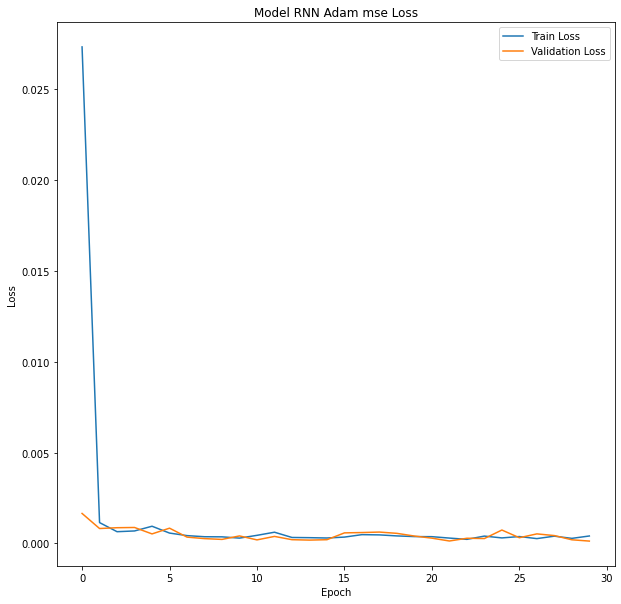

In [ ]:

plot_loss(trained_model1,"Model RNN Adam mse Loss", "Loss")


In [ ]:
prediction1=model1.predict(X_test)

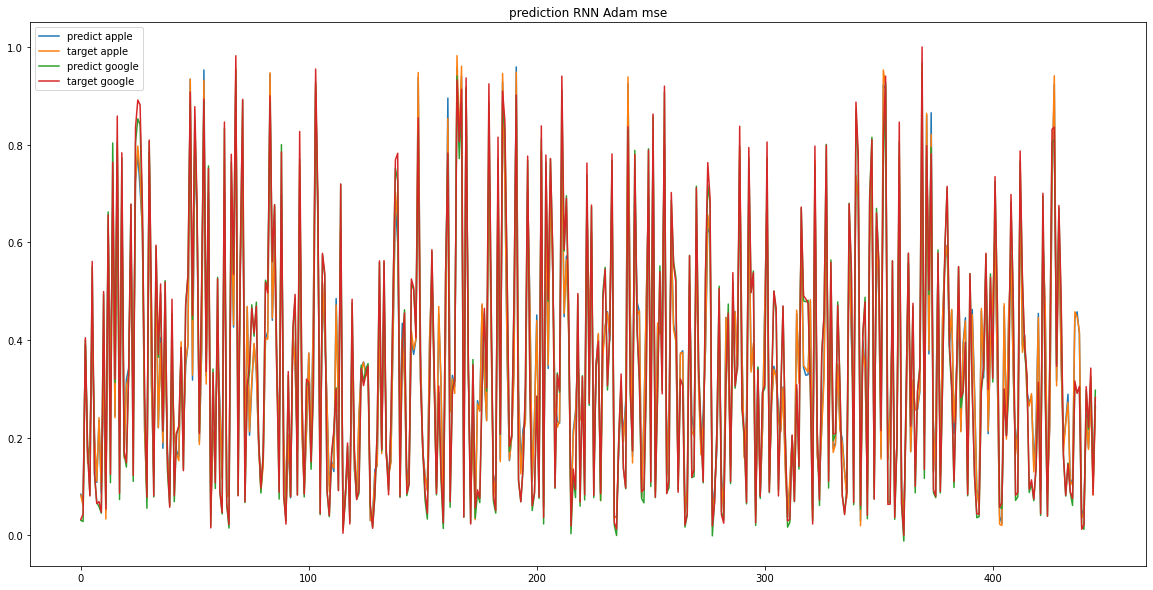

In [ ]:
fig_Predic = plt.figure(figsize=(20, 10))
plt.plot(prediction1[:,0])
plt.plot(y_test[:,0])
plt.plot(prediction1[:,1])
plt.plot(y_test[:,1])
plt.title("prediction RNN Adam mse")
plt.legend(["predict apple","target apple", "predict google", "target google"])
plt.show()

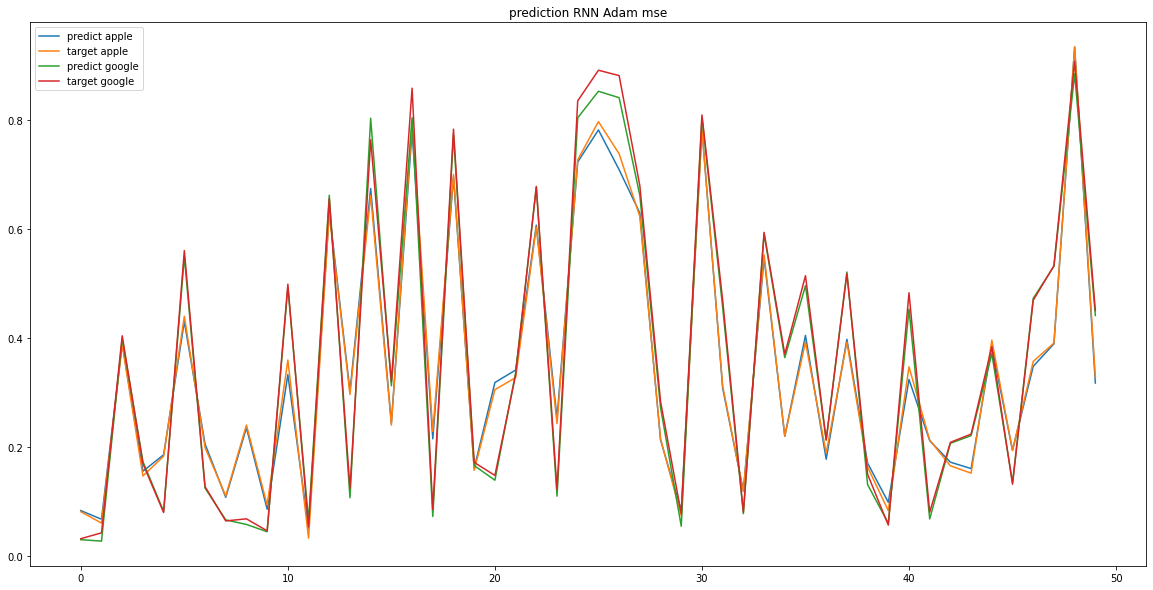

In [ ]:
plot_pred(prediction1, y_test, "prediction RNN Adam mse" )


#LSTM

In [ ]:
model2=Sequential()
model2.add(LSTM(100,input_shape=(30,12),return_sequences=True))
model2.add(LSTM(100))
model2.add(Dense(2))
model2.compile(optimizer='Adam', loss='mse')
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 100)           45200     
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dense_19 (Dense)            (None, 2)                 202       
                                                                 
Total params: 125,802
Trainable params: 125,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start=datetime.datetime.now()
trained_model2=model2.fit(X_train,y_train , epochs=30 , batch_size = 64 ,validation_split=0.2)
end=datetime.datetime.now()
time_lstm_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
23/23 [==============================] - 6s 113ms/step - loss: 0.0190 - val_loss: 0.0019
Epoch 2/30
23/23 [==============================] - 2s 75ms/step - loss: 0.0012 - val_loss: 6.5412e-04
Epoch 3/30
23/23 [==============================] - 2s 75ms/step - loss: 5.7577e-04 - val_loss: 4.0254e-04
Epoch 4/30
23/23 [==============================] - 2s 74ms/step - loss: 3.7934e-04 - val_loss: 3.3814e-04
Epoch 5/30
23/23 [==============================] - 2s 73ms/step - loss: 3.5178e-04 - val_loss: 3.2204e-04
Epoch 6/30
23/23 [==============================] - 2s 74ms/step - loss: 3.5751e-04 - val_loss: 3.7140e-04
Epoch 7/30
23/23 [==============================] - 2s 74ms/step - loss: 3.5411e-04 - val_loss: 3.1125e-04
Epoch 8/30
23/23 [==============================] - 2s 73ms/step - loss: 3.3276e-04 - val_loss: 3.2814e-04
Epoch 9/30
23/23 [==============================] - 2s 75ms/step - loss: 3.4612e-04 - val_loss: 3.0127e-04
Epoch 10/30
23/23 [=============================

In [ ]:
prediction2=model2.predict(X_test)

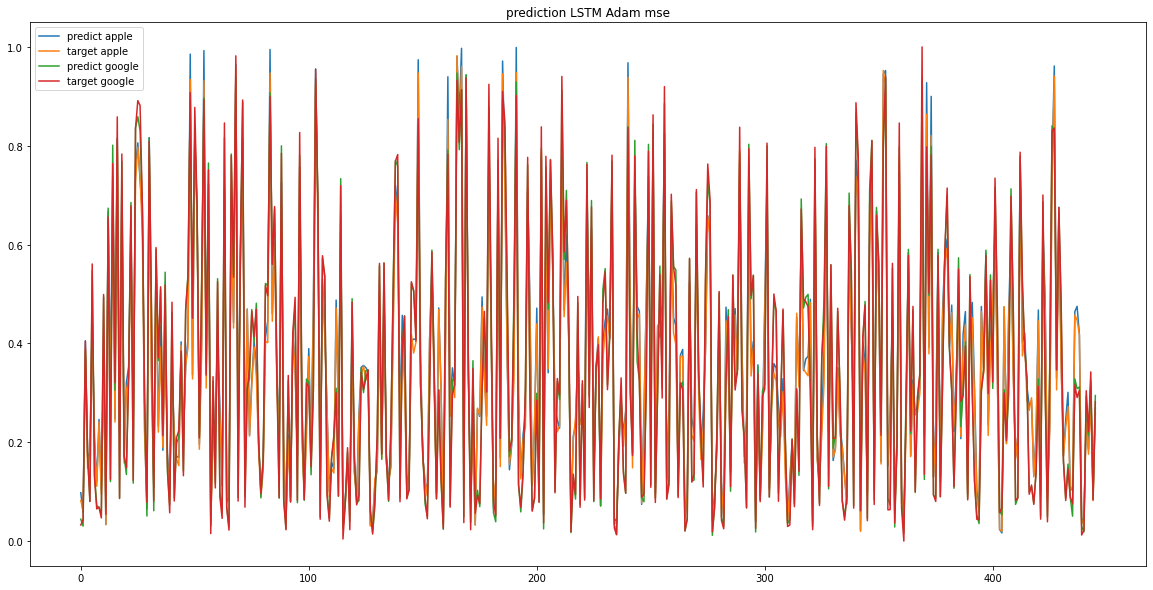

In [ ]:
fig_Predic = plt.figure(figsize=(20, 10))
plt.plot(prediction2[:,0])
plt.plot(y_test[:,0])
plt.plot(prediction2[:,1])
plt.plot(y_test[:,1])
plt.title("prediction LSTM Adam mse")
plt.legend(["predict apple","target apple", "predict google", "target google"])
plt.show()

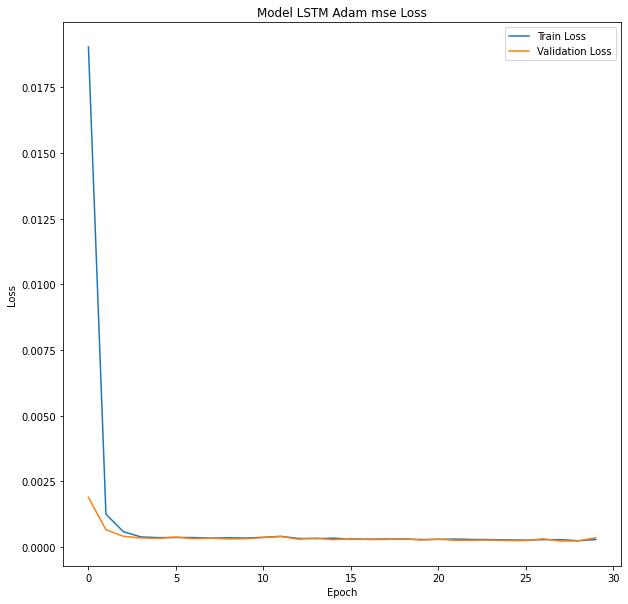

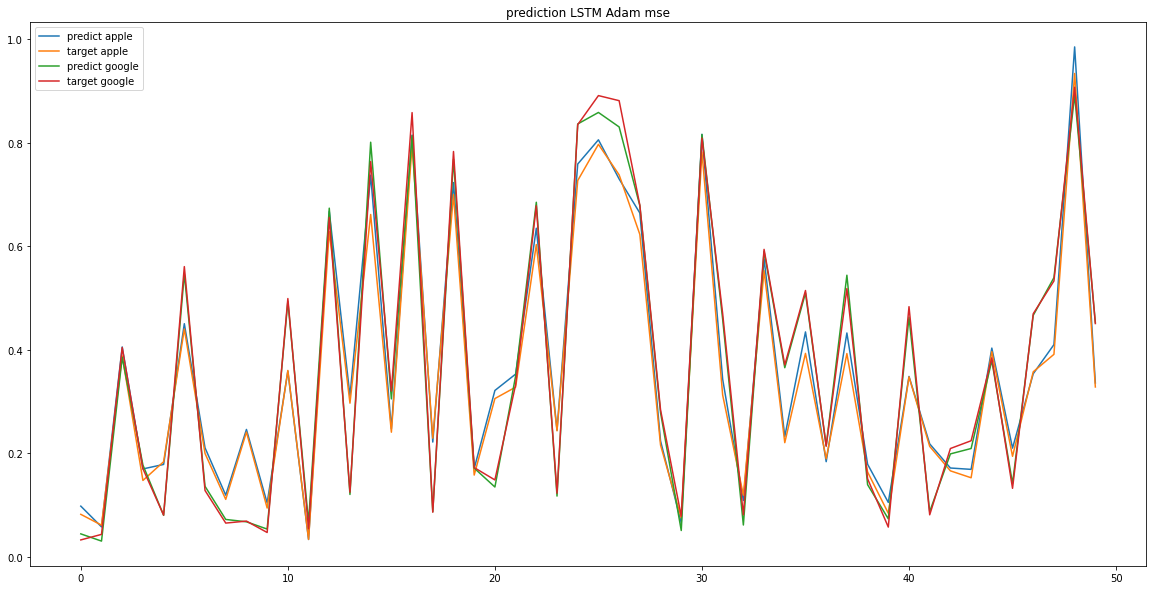

In [ ]:

plot_loss(trained_model2,"Model LSTM Adam mse Loss", "Loss")
plot_pred(prediction2, y_test, "prediction LSTM Adam mse" )

#GRU

In [ ]:
model3=Sequential()
model3.add(GRU(100,input_shape=(30,12),return_sequences=True))
model3.add(GRU(100))
model3.add(Dense(2))
model3.compile(optimizer='Adam', loss='mse')
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 30, 100)           34200     
                                                                 
 gru_3 (GRU)                 (None, 100)               60600     
                                                                 
 dense_20 (Dense)            (None, 2)                 202       
                                                                 
Total params: 95,002
Trainable params: 95,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start=datetime.datetime.now()
trained_model3=model3.fit(X_train,y_train , epochs=30 , batch_size = 64 ,validation_split=0.2)
end=datetime.datetime.now()
time_lstm_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
23/23 [==============================] - 6s 104ms/step - loss: 0.0237 - val_loss: 0.0060
Epoch 2/30
23/23 [==============================] - 2s 66ms/step - loss: 0.0018 - val_loss: 7.8872e-04
Epoch 3/30
23/23 [==============================] - 2s 66ms/step - loss: 4.2783e-04 - val_loss: 3.3492e-04
Epoch 4/30
23/23 [==============================] - 2s 67ms/step - loss: 2.9931e-04 - val_loss: 2.7365e-04
Epoch 5/30
23/23 [==============================] - 2s 67ms/step - loss: 2.4967e-04 - val_loss: 2.3258e-04
Epoch 6/30
23/23 [==============================] - 2s 68ms/step - loss: 2.2142e-04 - val_loss: 2.1142e-04
Epoch 7/30
23/23 [==============================] - 2s 68ms/step - loss: 1.8881e-04 - val_loss: 1.7909e-04
Epoch 8/30
23/23 [==============================] - 2s 67ms/step - loss: 1.8782e-04 - val_loss: 1.6605e-04
Epoch 9/30
23/23 [==============================] - 2s 67ms/step - loss: 1.7317e-04 - val_loss: 1.5226e-04
Epoch 10/30
23/23 [=============================

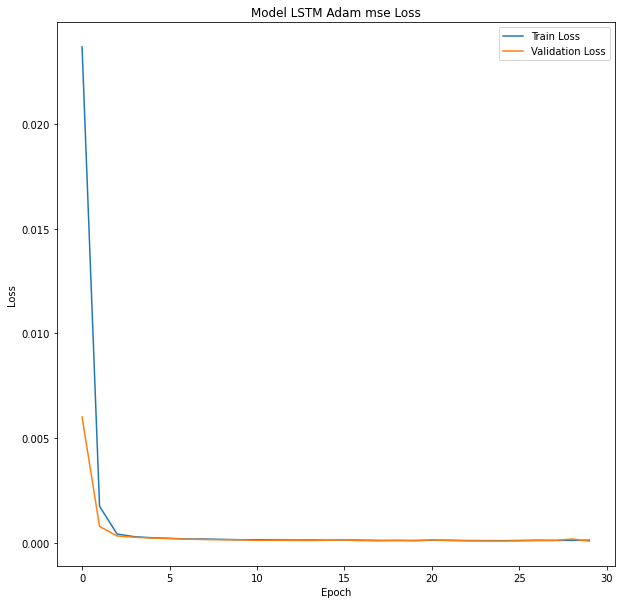

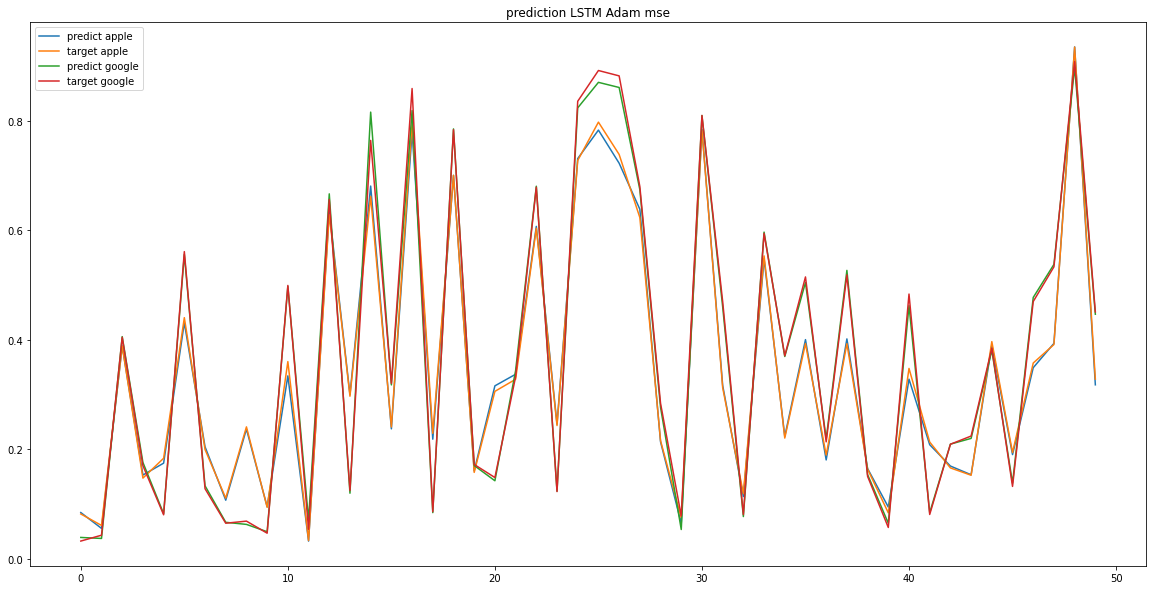

In [ ]:
prediction3=model3.predict(X_test)
plot_loss(trained_model3,"Model LSTM Adam mse Loss", "Loss")
plot_pred(prediction3, y_test, "prediction LSTM Adam mse" )

# loss function

In [ ]:
model4=Sequential()
model4.add(SimpleRNN(100,input_shape=(30,12),return_sequences=True))
model4.add(SimpleRNN(100))
model4.add(Dense(2))
model4.compile(optimizer='Adam', loss='mape')

start=datetime.datetime.now()
trained_model4=model4.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 3s 29ms/step - loss: 127.0854 - val_loss: 161.2571
Epoch 2/30
45/45 [==============================] - 1s 21ms/step - loss: 55.7055 - val_loss: 142.7096
Epoch 3/30
45/45 [==============================] - 1s 21ms/step - loss: 48.2462 - val_loss: 54.0623
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 47.5544 - val_loss: 31.0135
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 28.1002 - val_loss: 89.7360
Epoch 6/30
45/45 [==============================] - 1s 20ms/step - loss: 51.1991 - val_loss: 18.1154
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 35.7110 - val_loss: 38.2074
Epoch 8/30
45/45 [==============================] - 1s 20ms/step - loss: 45.8559 - val_loss: 36.1767
Epoch 9/30
45/45 [==============================] - 1s 20ms/step - loss: 46.6321 - val_loss: 60.9930
Epoch 10/30
45/45 [==============================] - 1s 20ms/step - loss: 32.8063 - val_

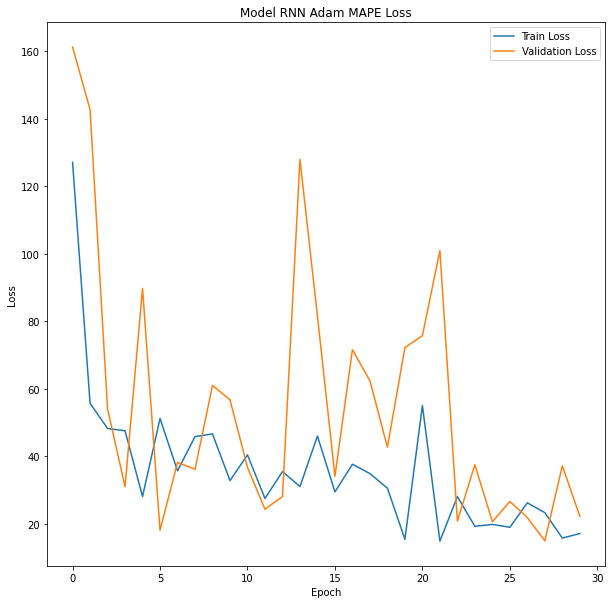

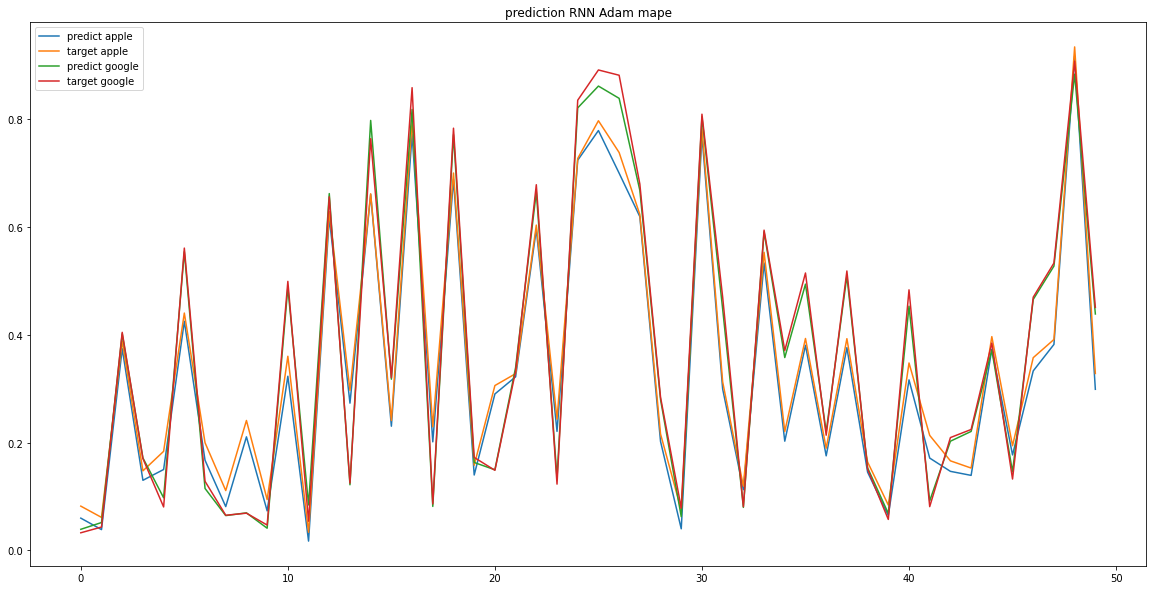

In [ ]:
prediction4=model4.predict(X_test)
plot_loss(trained_model4,"Model RNN Adam MAPE Loss", "Loss")
plot_pred(prediction4, y_test, "prediction RNN Adam mape" )

In [ ]:
model5=Sequential()
model5.add(LSTM(100,input_shape=(30,12),return_sequences=True))
model5.add(LSTM(100))
model5.add(Dense(2))
model5.compile(optimizer='Adam', loss='mape')

start=datetime.datetime.now()
trained_model5=model5.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_lstm_adam_mape=end-start

print ('Total_time_training:',time_lstm_adam_mape)

Epoch 1/30
45/45 [==============================] - 7s 73ms/step - loss: 21.4316 - val_loss: 15.3219
Epoch 2/30
45/45 [==============================] - 2s 51ms/step - loss: 8.2782 - val_loss: 13.5658
Epoch 3/30
45/45 [==============================] - 2s 51ms/step - loss: 8.8484 - val_loss: 15.6650
Epoch 4/30
45/45 [==============================] - 4s 93ms/step - loss: 7.3575 - val_loss: 11.6120
Epoch 5/30
45/45 [==============================] - 3s 78ms/step - loss: 7.4521 - val_loss: 16.9315
Epoch 6/30
45/45 [==============================] - 3s 71ms/step - loss: 6.4365 - val_loss: 11.6377
Epoch 7/30
45/45 [==============================] - 4s 86ms/step - loss: 6.2628 - val_loss: 14.2635
Epoch 8/30
45/45 [==============================] - 3s 77ms/step - loss: 6.4754 - val_loss: 14.5300
Epoch 9/30
45/45 [==============================] - 4s 93ms/step - loss: 6.2985 - val_loss: 12.3640
Epoch 10/30
45/45 [==============================] - 4s 96ms/step - loss: 6.2353 - val_loss: 7.4333

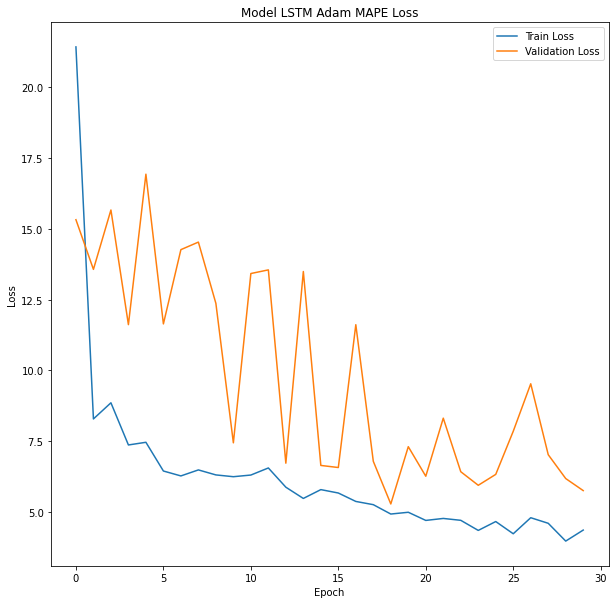

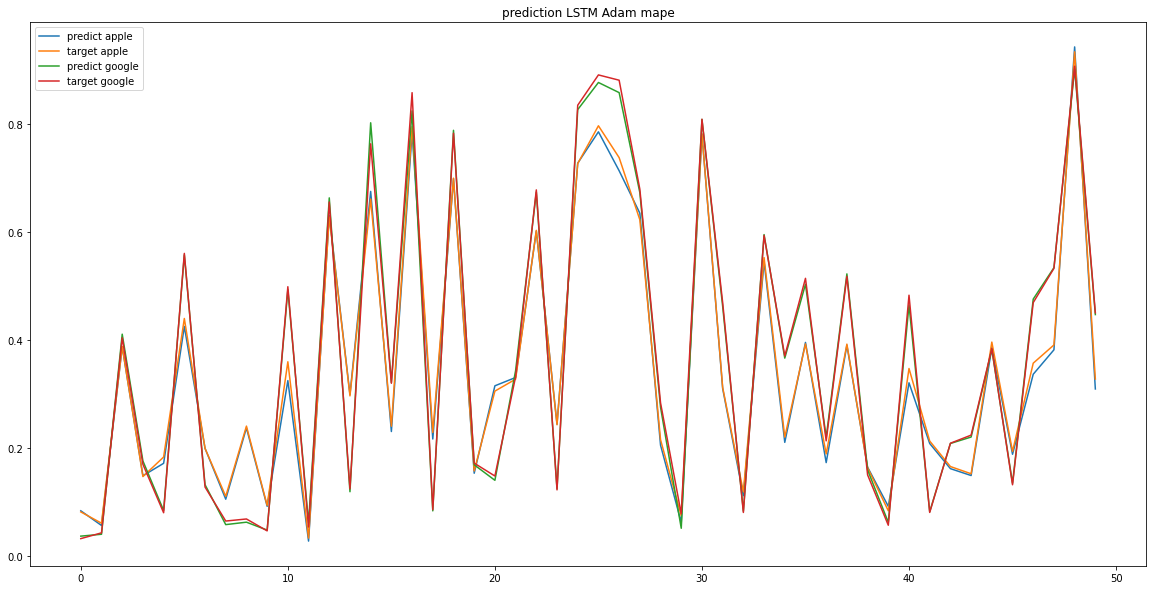

In [ ]:
prediction5=model5.predict(X_test)
plot_loss(trained_model5,"Model LSTM Adam MAPE Loss", "Loss")
plot_pred(prediction5, y_test, "prediction LSTM Adam mape" )

In [ ]:
model6=Sequential()
model6.add(GRU(100,input_shape=(30,12),return_sequences=True))
model6.add(GRU(100))
model6.add(Dense(2))
model6.compile(optimizer='Adam', loss='mape')

start=datetime.datetime.now()
trained_model6=model6.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_gru_adam_mape=end-start

print ('Total_time_training:',time_gru_adam_mape)

Epoch 1/30
45/45 [==============================] - 7s 67ms/step - loss: 31.5103 - val_loss: 12.8674
Epoch 2/30
45/45 [==============================] - 2s 47ms/step - loss: 8.9949 - val_loss: 7.9337
Epoch 3/30
45/45 [==============================] - 2s 48ms/step - loss: 7.8060 - val_loss: 28.0959
Epoch 4/30
45/45 [==============================] - 2s 48ms/step - loss: 10.1466 - val_loss: 13.9367
Epoch 5/30
45/45 [==============================] - 2s 48ms/step - loss: 6.3860 - val_loss: 10.8612
Epoch 6/30
45/45 [==============================] - 2s 48ms/step - loss: 5.6825 - val_loss: 7.9991
Epoch 7/30
45/45 [==============================] - 2s 49ms/step - loss: 6.0091 - val_loss: 6.6365
Epoch 8/30
45/45 [==============================] - 2s 48ms/step - loss: 5.0412 - val_loss: 5.6926
Epoch 9/30
45/45 [==============================] - 2s 47ms/step - loss: 6.4902 - val_loss: 9.3671
Epoch 10/30
45/45 [==============================] - 2s 47ms/step - loss: 4.8050 - val_loss: 6.0581
Epo

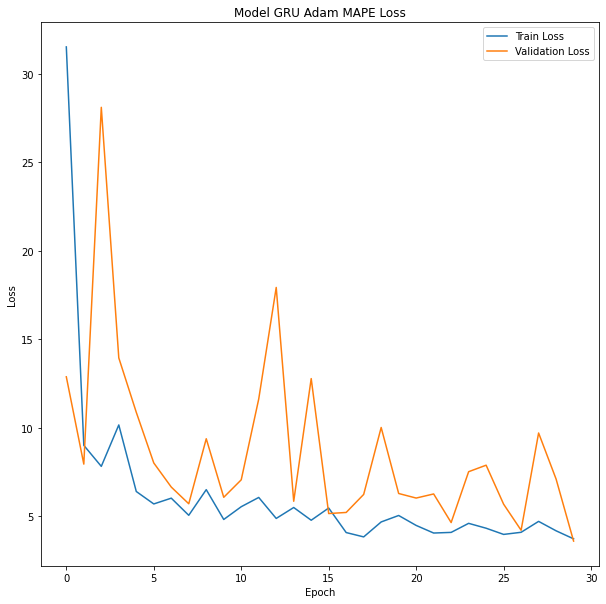

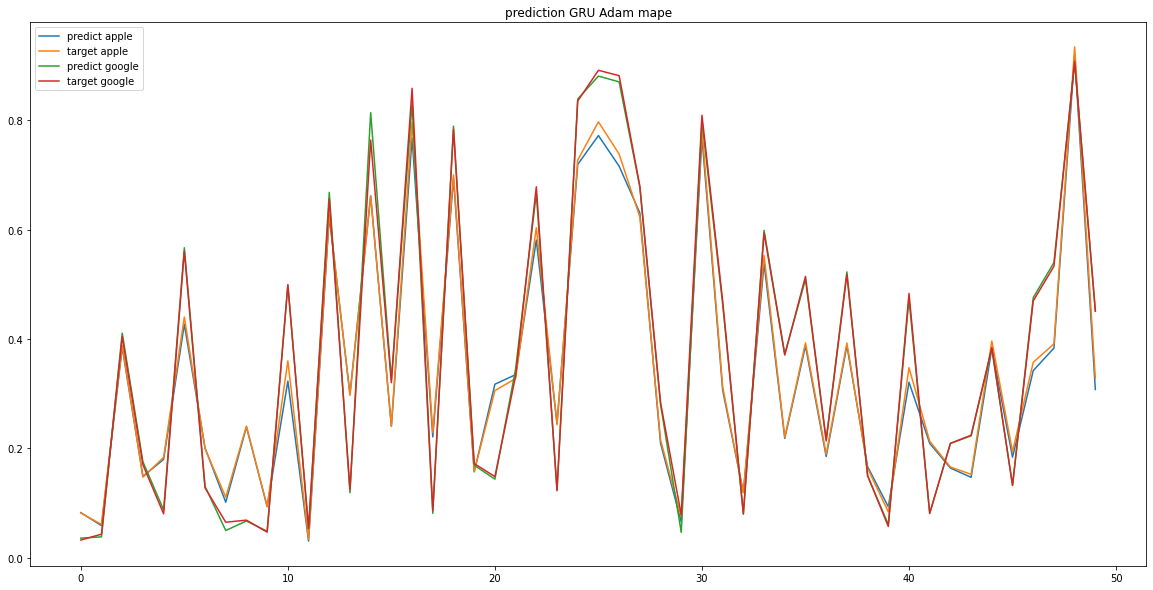

In [ ]:
prediction6=model6.predict(X_test)
plot_loss(trained_model6,"Model GRU Adam MAPE Loss", "Loss")
plot_pred(prediction6, y_test, "prediction GRU Adam mape" )

#optimizer with loss function = MSE

## adagrad

In [ ]:
opt= tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad")


In [ ]:
model7=Sequential()
model7.add(SimpleRNN(100,input_shape=(30,12),return_sequences=True))
model7.add(SimpleRNN(100))
model7.add(Dense(2))

model7.compile(optimizer=opt, loss='mse')

start=datetime.datetime.now()
trained_model7=model7.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 3s 27ms/step - loss: 0.0679 - val_loss: 0.0145
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0064 - val_loss: 0.0067
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 6/30
45/45 [==============================] - 1s 19ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 7/30
45/45 [==============================] - 1s 19ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 8/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 9/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 10/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 11/

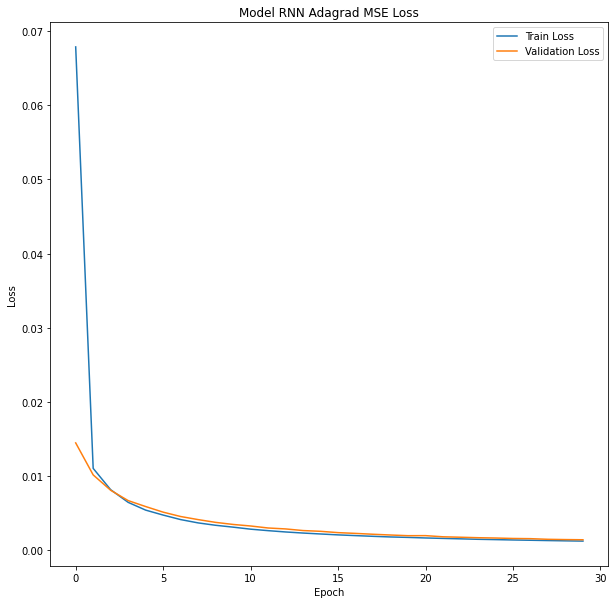

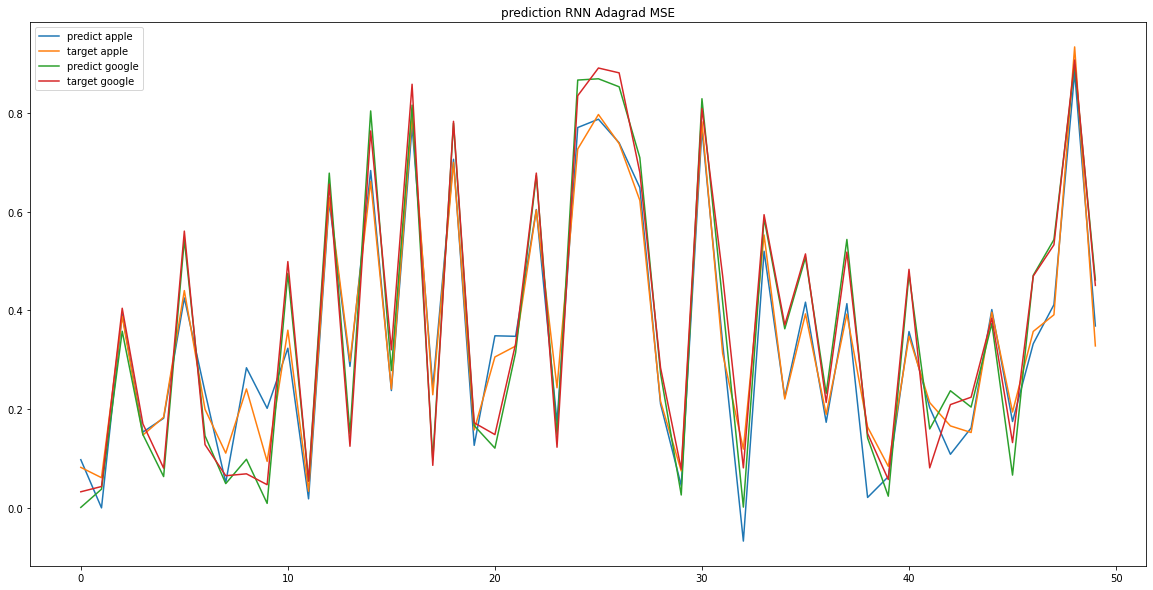

In [ ]:
prediction7=model7.predict(X_test)
plot_loss(trained_model7,"Model RNN Adagrad MSE Loss", "Loss")
plot_pred(prediction7, y_test, "prediction RNN Adagrad MSE" )

In [ ]:
model8=Sequential()
model8.add(LSTM(100,input_shape=(30,12),return_sequences=True))
model8.add(LSTM(100))
model8.add(Dense(2))

model8.compile(optimizer=opt, loss='mse')

start=datetime.datetime.now()
trained_model8=model8.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 7s 72ms/step - loss: 0.0985 - val_loss: 0.0431
Epoch 2/30
45/45 [==============================] - 2s 52ms/step - loss: 0.0318 - val_loss: 0.0198
Epoch 3/30
45/45 [==============================] - 2s 52ms/step - loss: 0.0180 - val_loss: 0.0143
Epoch 4/30
45/45 [==============================] - 3s 72ms/step - loss: 0.0139 - val_loss: 0.0119
Epoch 5/30
45/45 [==============================] - 5s 107ms/step - loss: 0.0117 - val_loss: 0.0102
Epoch 6/30
45/45 [==============================] - 4s 97ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 7/30
45/45 [==============================] - 4s 95ms/step - loss: 0.0087 - val_loss: 0.0076
Epoch 8/30
45/45 [==============================] - 3s 67ms/step - loss: 0.0075 - val_loss: 0.0066
Epoch 9/30
45/45 [==============================] - 4s 91ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 10/30
45/45 [==============================] - 4s 98ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 11

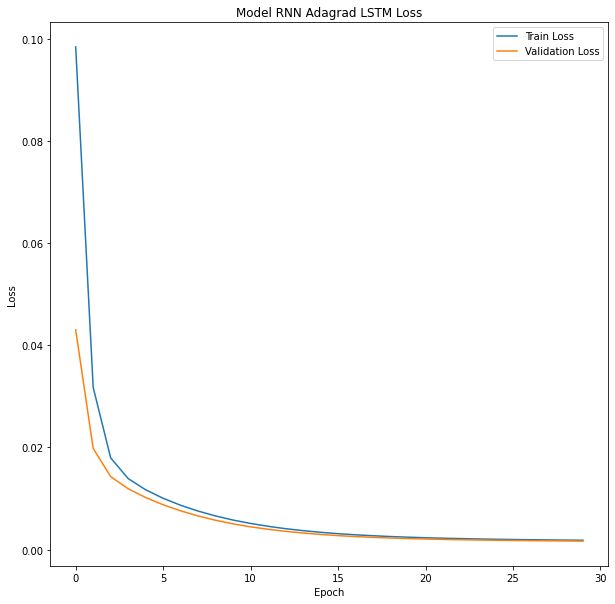

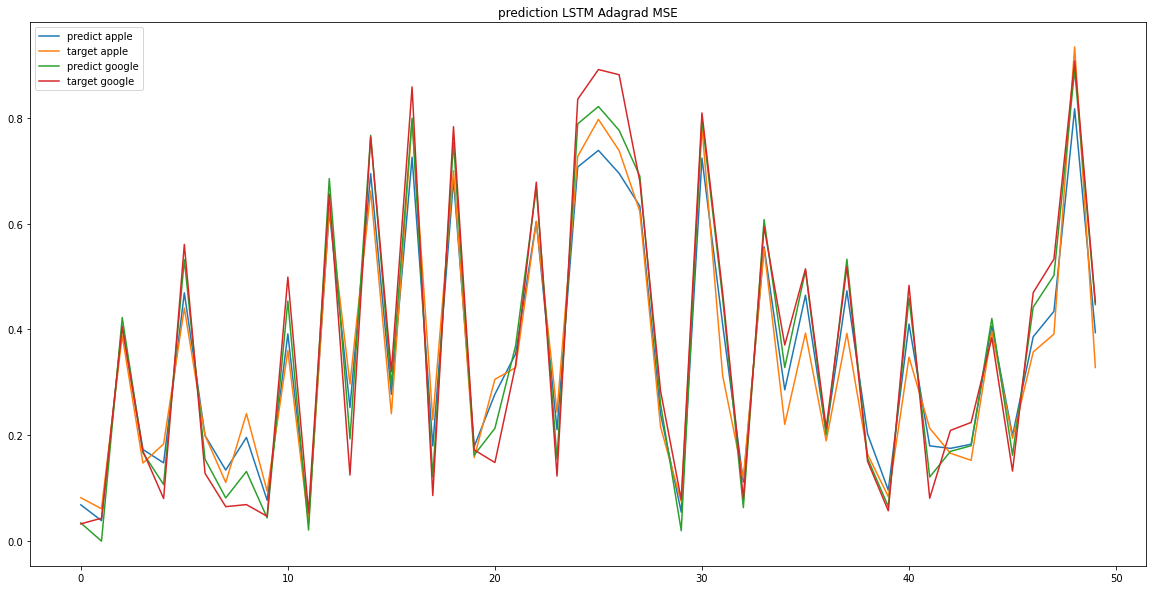

In [ ]:
prediction8=model8.predict(X_test)
plot_loss(trained_model8,"Model RNN Adagrad LSTM Loss", "Loss")
plot_pred(prediction8, y_test, "prediction LSTM Adagrad MSE" )

In [ ]:
model9=Sequential()
model9.add(GRU(100,input_shape=(30,12),return_sequences=True))
model9.add(GRU(100))
model9.add(Dense(2))

model9.compile(optimizer=opt, loss='mse')

start=datetime.datetime.now()
trained_model9=model9.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 7s 79ms/step - loss: 0.0727 - val_loss: 0.0171
Epoch 2/30
45/45 [==============================] - 3s 62ms/step - loss: 0.0125 - val_loss: 0.0085
Epoch 3/30
45/45 [==============================] - 2s 46ms/step - loss: 0.0081 - val_loss: 0.0069
Epoch 4/30
45/45 [==============================] - 2s 46ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 5/30
45/45 [==============================] - 2s 46ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 6/30
45/45 [==============================] - 2s 46ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 7/30
45/45 [==============================] - 2s 46ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 8/30
45/45 [==============================] - 2s 47ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 9/30
45/45 [==============================] - 2s 47ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 10/30
45/45 [==============================] - 2s 47ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 11/

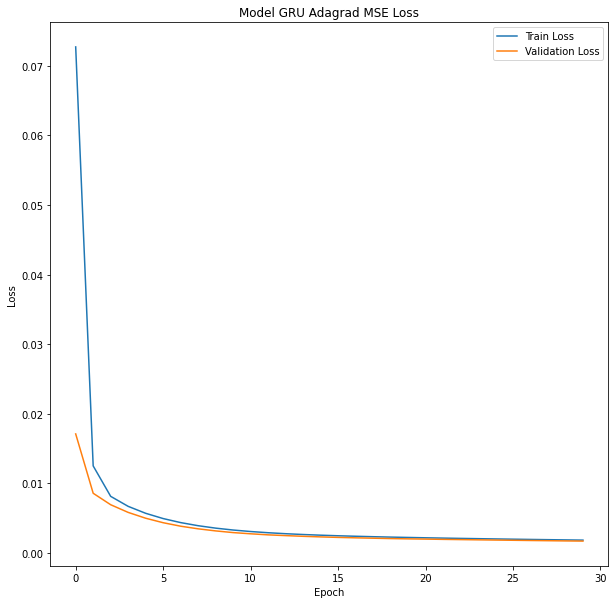

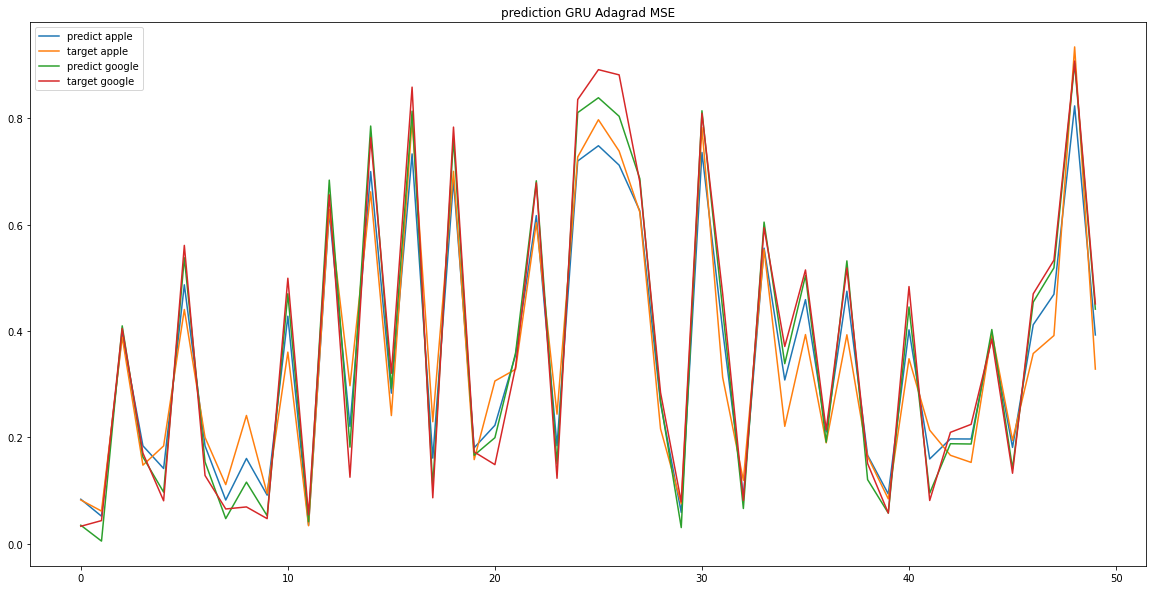

In [ ]:
prediction9=model9.predict(X_test)
plot_loss(trained_model9,"Model GRU Adagrad MSE Loss", "Loss")
plot_pred(prediction9, y_test, "prediction GRU Adagrad MSE" )

## RMSprop

In [ ]:
opt3 =tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)


In [ ]:
model10=Sequential()
model10.add(SimpleRNN(100,input_shape=(30,12),return_sequences=True))
model10.add(SimpleRNN(100))
model10.add(Dense(2))

model10.compile(optimizer=opt3, loss='mse')

start=datetime.datetime.now()
trained_model10=model10.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 3s 26ms/step - loss: 0.0969 - val_loss: 0.0036
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0347 - val_loss: 0.0100
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0248 - val_loss: 0.0101
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0216 - val_loss: 0.0075
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0129 - val_loss: 0.0110
Epoch 6/30
45/45 [==============================] - 1s 22ms/step - loss: 0.0089 - val_loss: 0.0141
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0051 - val_loss: 0.0012
Epoch 8/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0033 - val_loss: 0.0130
Epoch 9/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 10/30
45/45 [==============================] - 1s 20ms/step - loss: 0.0025 - val_loss: 3.7354e-04
Epoch

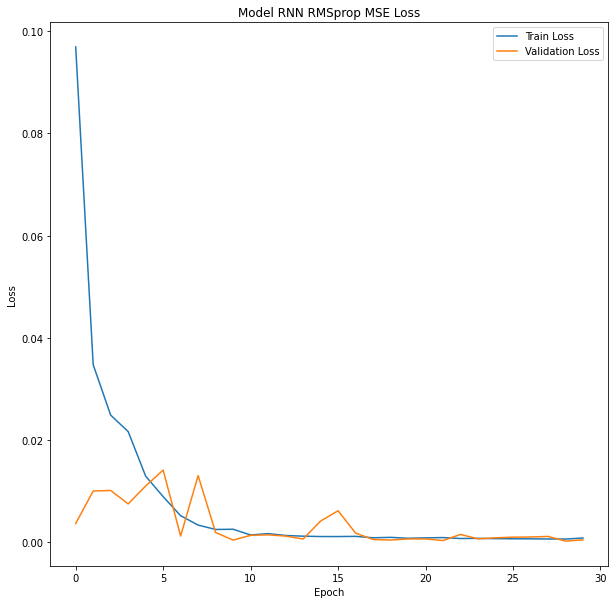

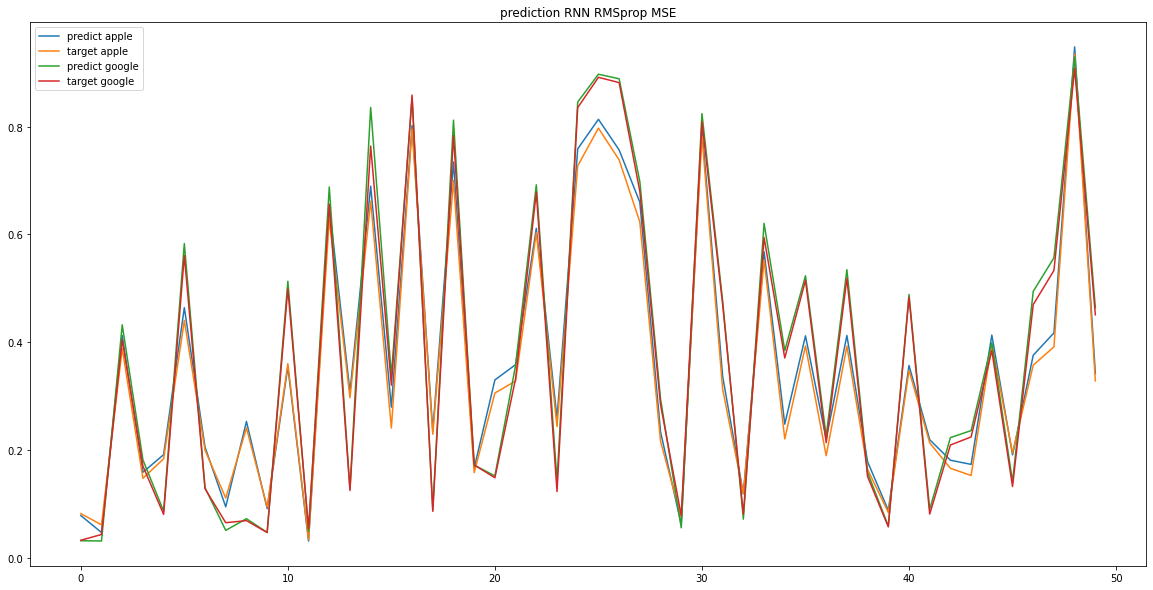

In [ ]:
prediction10=model10.predict(X_test)
plot_loss(trained_model10,"Model RNN RMSprop MSE Loss", "Loss")
plot_pred(prediction10, y_test, "prediction RNN RMSprop MSE" )

In [ ]:
model11=Sequential()
model11.add(LSTM(100,input_shape=(30,12),return_sequences=True))
model11.add(LSTM(100))
model11.add(Dense(2))

model11.compile(optimizer=opt3, loss='mse')

start=datetime.datetime.now()
trained_model11=model11.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 10s 107ms/step - loss: 0.0127 - val_loss: 0.0014
Epoch 2/30
45/45 [==============================] - 4s 96ms/step - loss: 0.0041 - val_loss: 6.0619e-04
Epoch 3/30
45/45 [==============================] - 3s 62ms/step - loss: 0.0028 - val_loss: 9.8940e-04
Epoch 4/30
45/45 [==============================] - 4s 101ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 5/30
45/45 [==============================] - 5s 115ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 6/30
45/45 [==============================] - 4s 86ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 7/30
45/45 [==============================] - 3s 76ms/step - loss: 0.0014 - val_loss: 7.6414e-04
Epoch 8/30
45/45 [==============================] - 4s 91ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 9/30
45/45 [==============================] - 4s 86ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 10/30
45/45 [==============================] - 4s 79ms/step - loss: 0.0010 - val_loss: 

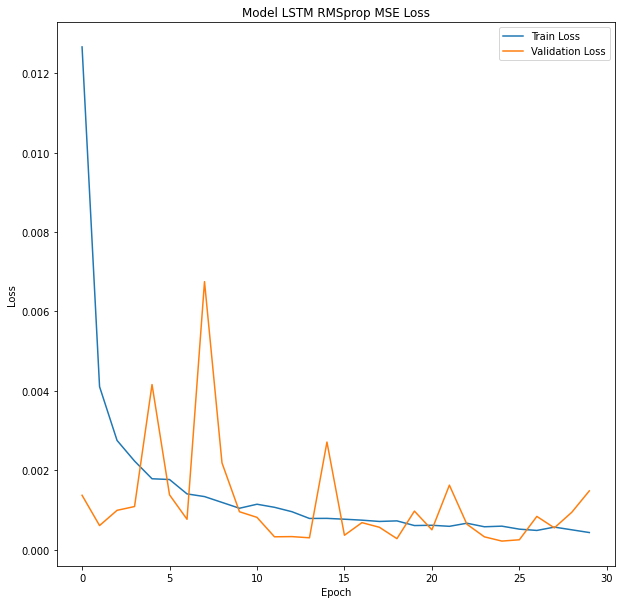

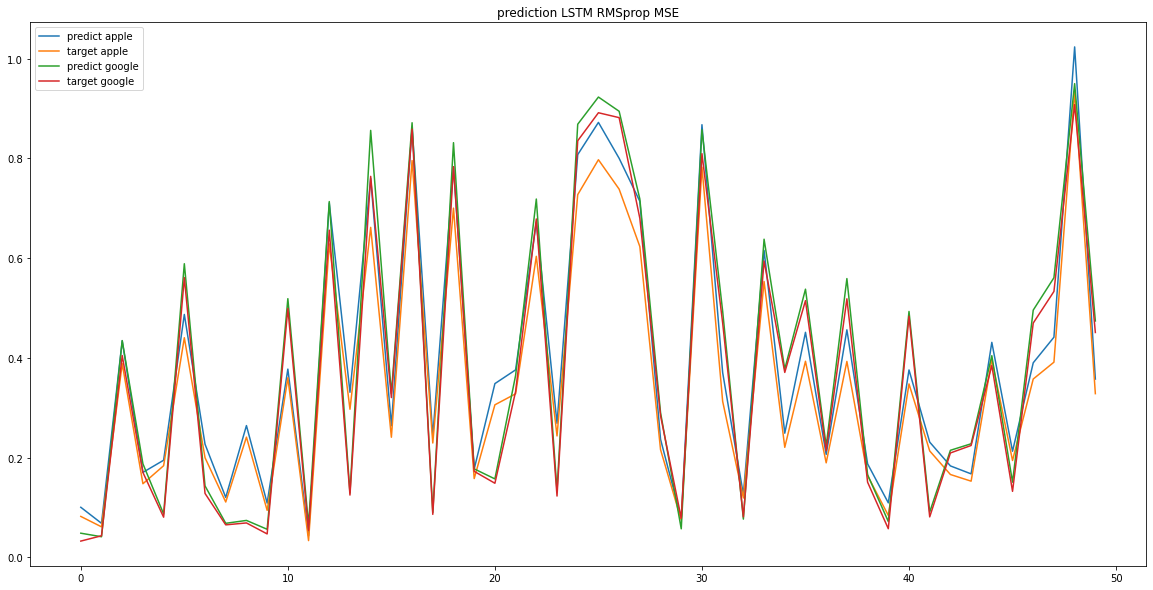

In [ ]:
prediction11=model11.predict(X_test)
plot_loss(trained_model11,"Model LSTM RMSprop MSE Loss", "Loss")
plot_pred(prediction11, y_test, "prediction LSTM RMSprop MSE" )

In [ ]:
model12=Sequential()
model12.add(GRU(100,input_shape=(30,12),return_sequences=True))
model12.add(GRU(100))
model12.add(Dense(2))

model12.compile(optimizer=opt3, loss='mse')

start=datetime.datetime.now()
trained_model12=model12.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 8s 92ms/step - loss: 0.0133 - val_loss: 8.6017e-04
Epoch 2/30
45/45 [==============================] - 2s 47ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 3/30
45/45 [==============================] - 3s 76ms/step - loss: 0.0021 - val_loss: 8.6912e-04
Epoch 4/30
45/45 [==============================] - 4s 86ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 5/30
45/45 [==============================] - 4s 80ms/step - loss: 0.0017 - val_loss: 1.6158e-04
Epoch 6/30
45/45 [==============================] - 2s 50ms/step - loss: 0.0014 - val_loss: 7.1677e-04
Epoch 7/30
45/45 [==============================] - 4s 85ms/step - loss: 0.0011 - val_loss: 5.8809e-04
Epoch 8/30
45/45 [==============================] - 2s 47ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 9/30
45/45 [==============================] - 2s 48ms/step - loss: 9.3885e-04 - val_loss: 0.0013
Epoch 10/30
45/45 [==============================] - 2s 48ms/step - loss: 8.8975e-04 

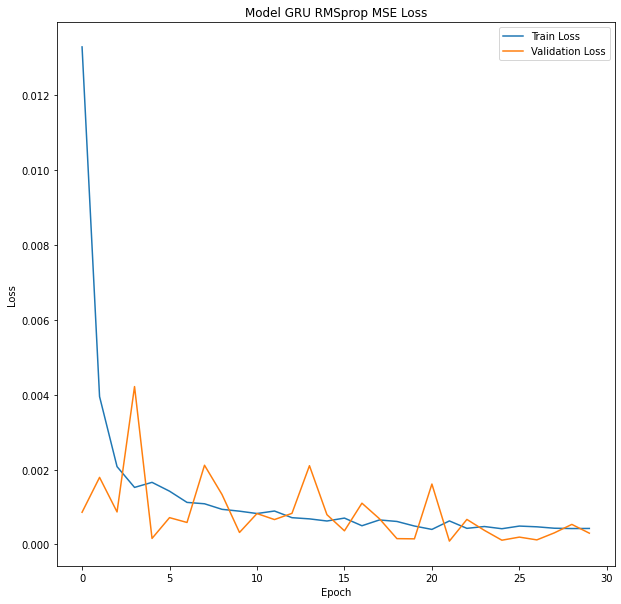

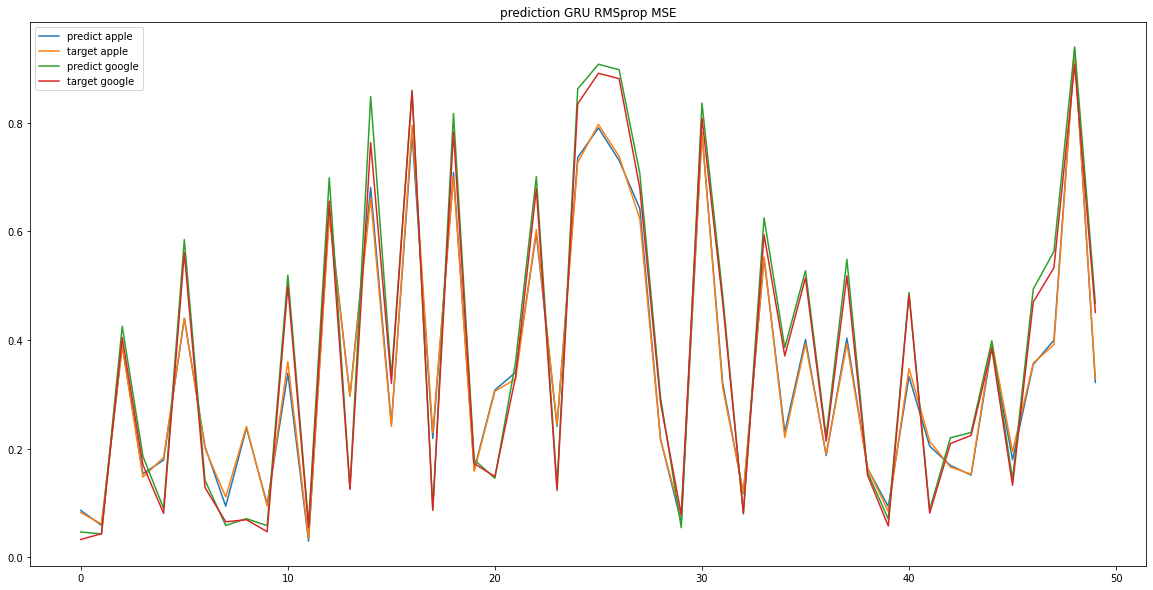

In [ ]:
prediction12=model12.predict(X_test)
plot_loss(trained_model12,"Model GRU RMSprop MSE Loss", "Loss")
plot_pred(prediction12, y_test, "prediction GRU RMSprop MSE" )

#Dropout with adam and MSE

In [ ]:
model13=Sequential()
model13.add(SimpleRNN(100,input_shape=(30,12),return_sequences=True))
model13.add(Dropout(0.2))
model13.add(SimpleRNN(100))
model13.add(Dropout(0.2))
model13.add(Dense(2))

model13.compile(optimizer='adam', loss='mse')

start=datetime.datetime.now()
trained_model13=model13.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 3s 29ms/step - loss: 0.1793 - val_loss: 0.0380
Epoch 2/30
45/45 [==============================] - 2s 34ms/step - loss: 0.0585 - val_loss: 0.0051
Epoch 3/30
45/45 [==============================] - 2s 48ms/step - loss: 0.0336 - val_loss: 0.0043
Epoch 4/30
45/45 [==============================] - 2s 41ms/step - loss: 0.0235 - val_loss: 0.0026
Epoch 5/30
45/45 [==============================] - 2s 39ms/step - loss: 0.0167 - val_loss: 9.7569e-04
Epoch 6/30
45/45 [==============================] - 2s 38ms/step - loss: 0.0131 - val_loss: 0.0011
Epoch 7/30
45/45 [==============================] - 2s 39ms/step - loss: 0.0112 - val_loss: 7.8162e-04
Epoch 8/30
45/45 [==============================] - 1s 22ms/step - loss: 0.0089 - val_loss: 3.5685e-04
Epoch 9/30
45/45 [==============================] - 1s 21ms/step - loss: 0.0083 - val_loss: 6.2326e-04
Epoch 10/30
45/45 [==============================] - 1s 21ms/step - loss: 0.0075 - val_loss: 

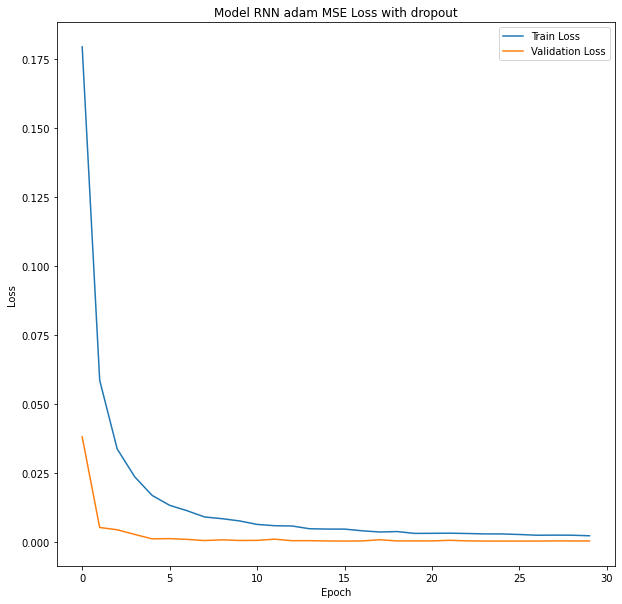

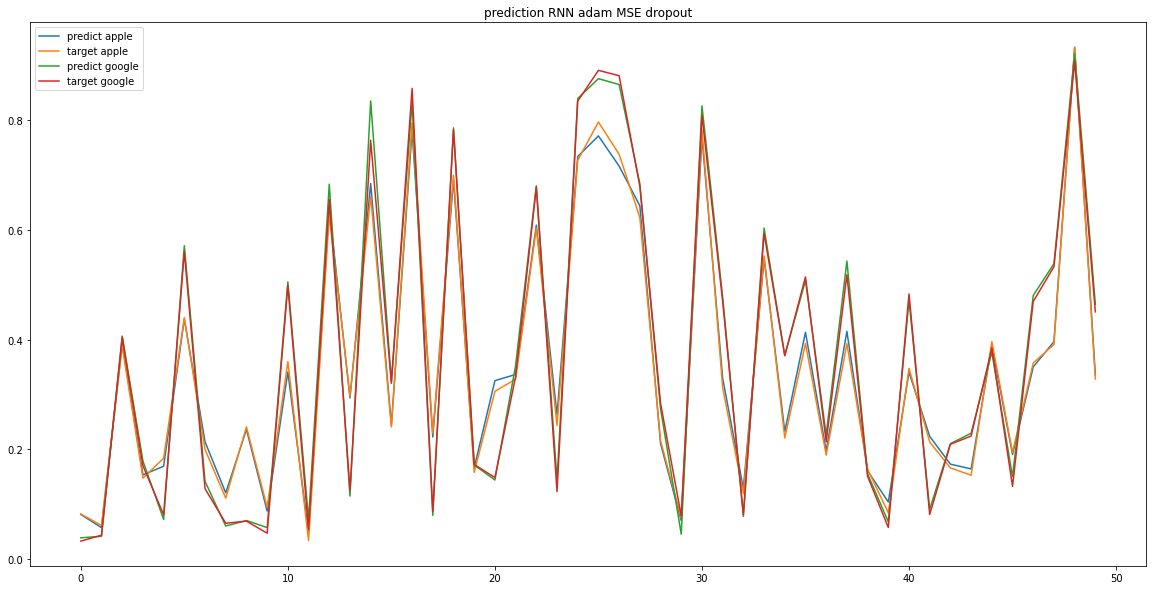

In [ ]:
prediction13=model13.predict(X_test)
plot_loss(trained_model13,"Model RNN adam MSE Loss with dropout", "Loss")
plot_pred(prediction13, y_test, "prediction RNN adam MSE dropout" )

In [ ]:
model14=Sequential()
model14.add(LSTM(100,input_shape=(30,12),return_sequences=True))
model14.add(Dropout(0.2))
model14.add(LSTM(100))
model14.add(Dropout(0.2))
model14.add(Dense(2))

model14.compile(optimizer='adam', loss='mse')

start=datetime.datetime.now()
trained_model14=model14.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 7s 74ms/step - loss: 0.0125 - val_loss: 6.1175e-04
Epoch 2/30
45/45 [==============================] - 2s 53ms/step - loss: 0.0023 - val_loss: 4.1395e-04
Epoch 3/30
45/45 [==============================] - 2s 53ms/step - loss: 0.0019 - val_loss: 5.1166e-04
Epoch 4/30
45/45 [==============================] - 2s 53ms/step - loss: 0.0018 - val_loss: 3.9645e-04
Epoch 5/30
45/45 [==============================] - 2s 53ms/step - loss: 0.0017 - val_loss: 5.5545e-04
Epoch 6/30
45/45 [==============================] - 2s 53ms/step - loss: 0.0020 - val_loss: 3.3915e-04
Epoch 7/30
45/45 [==============================] - 2s 52ms/step - loss: 0.0014 - val_loss: 3.3151e-04
Epoch 8/30
45/45 [==============================] - 2s 52ms/step - loss: 0.0013 - val_loss: 4.1631e-04
Epoch 9/30
45/45 [==============================] - 2s 53ms/step - loss: 0.0013 - val_loss: 5.4675e-04
Epoch 10/30
45/45 [==============================] - 2s 52ms/step - loss:

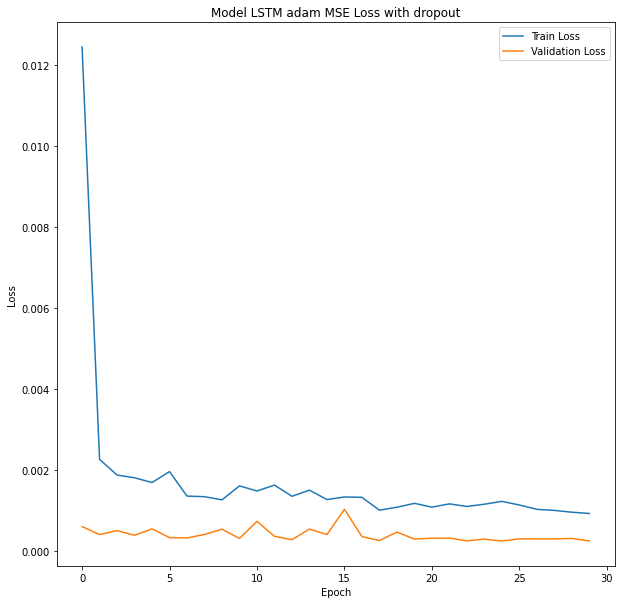

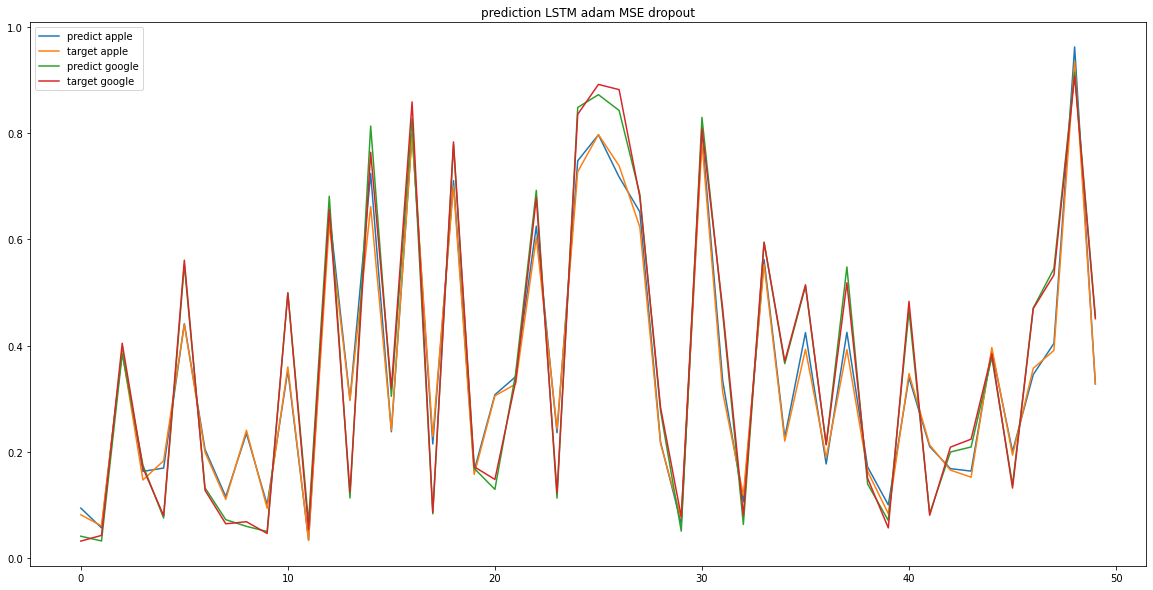

In [ ]:
prediction14=model14.predict(X_test)
plot_loss(trained_model14,"Model LSTM adam MSE Loss with dropout", "Loss")
plot_pred(prediction14, y_test, "prediction LSTM adam MSE dropout" )

In [ ]:
model15=Sequential()
model15.add(GRU(100,input_shape=(30,12),return_sequences=True))
model15.add(Dropout(0.2))
model15.add(GRU(100))
model15.add(Dropout(0.2))
model15.add(Dense(2))

model15.compile(optimizer='adam', loss='mse')

start=datetime.datetime.now()
trained_model15=model15.fit(X_train,y_train , epochs=30  ,validation_split=0.2)
end=datetime.datetime.now()
time_rnn_adam_mse=end-start

print ('Total_time_training:',time_rnn_adam_mse )

Epoch 1/30
45/45 [==============================] - 7s 66ms/step - loss: 0.0118 - val_loss: 3.8835e-04
Epoch 2/30
45/45 [==============================] - 2s 48ms/step - loss: 0.0028 - val_loss: 3.3876e-04
Epoch 3/30
45/45 [==============================] - 2s 47ms/step - loss: 0.0023 - val_loss: 2.8476e-04
Epoch 4/30
45/45 [==============================] - 2s 48ms/step - loss: 0.0021 - val_loss: 3.6568e-04
Epoch 5/30
45/45 [==============================] - 2s 49ms/step - loss: 0.0019 - val_loss: 1.9608e-04
Epoch 6/30
45/45 [==============================] - 2s 47ms/step - loss: 0.0017 - val_loss: 1.8934e-04
Epoch 7/30
45/45 [==============================] - 2s 47ms/step - loss: 0.0015 - val_loss: 3.1059e-04
Epoch 8/30
45/45 [==============================] - 2s 48ms/step - loss: 0.0016 - val_loss: 3.7092e-04
Epoch 9/30
45/45 [==============================] - 2s 48ms/step - loss: 0.0015 - val_loss: 1.8545e-04
Epoch 10/30
45/45 [==============================] - 2s 49ms/step - loss:

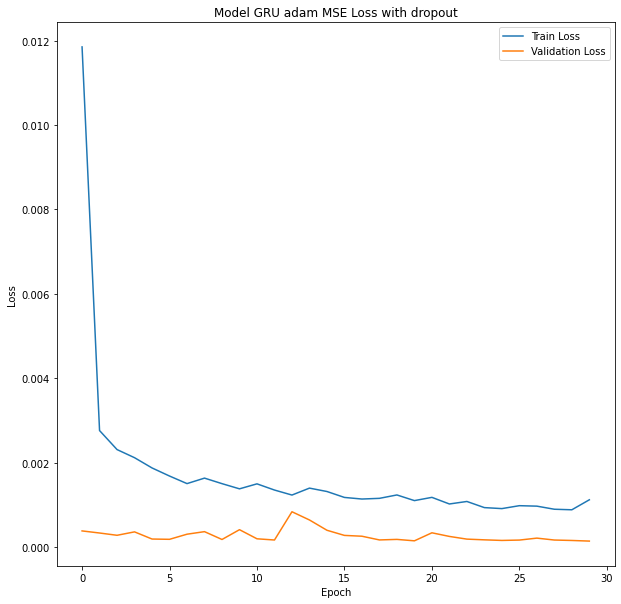

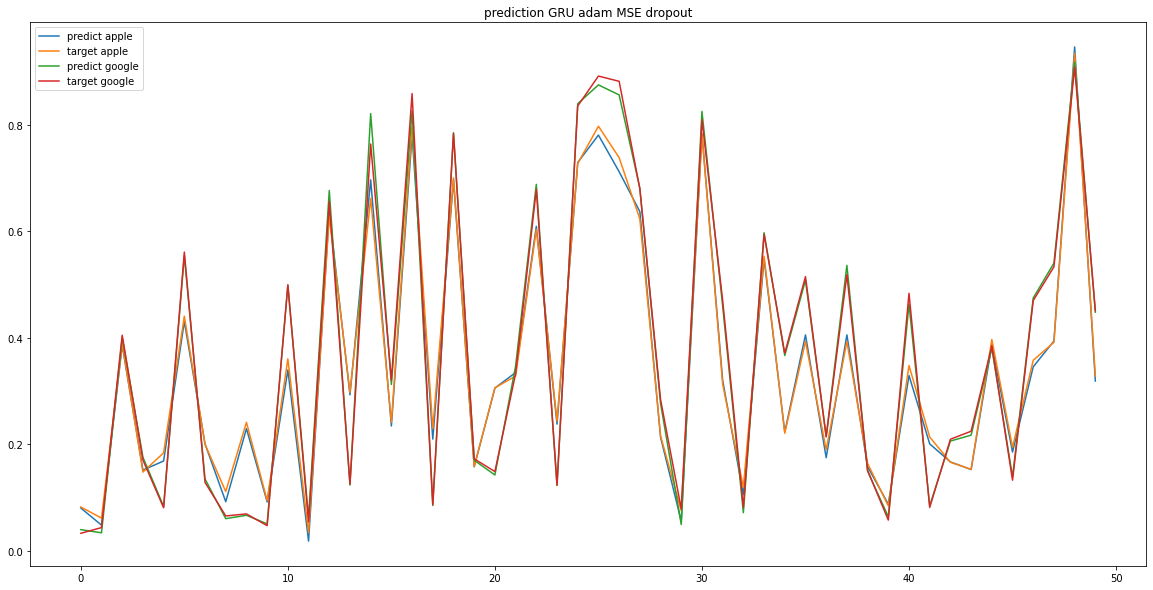

In [ ]:
prediction15=model15.predict(X_test)
plot_loss(trained_model15,"Model GRU adam MSE Loss with dropout", "Loss")
plot_pred(prediction15, y_test, "prediction GRU adam MSE dropout" )